In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib
import os


In [3]:
df = pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.drop("Car_Name", axis=1, inplace=True)
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [5]:
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [6]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9133788577646791
MSE: 2.1895502072034656


In [10]:
joblib.dump(model, "car_model.pkl")
joblib.dump(list(X.columns), "model_features.pkl")

['model_features.pkl']

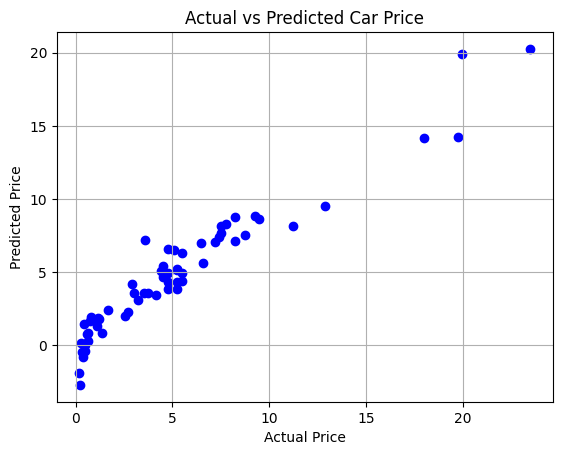

In [11]:
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price")
plt.grid(True)
plt.show()


In [13]:
for file in os.listdir():
    print(file)

.ipynb_checkpoints
car data.csv
car_model.pkl
Car_Prediction.ipynb
model_features.pkl


In [14]:
model = joblib.load("car_model.pkl")
features = joblib.load("model_features.pkl")

print("Model loaded successfully!")
print("Features:", features)


Model loaded successfully!
Features: ['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_Age']
